In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
from sklearn import datasets
from scipy.stats import chisquare, chi2_contingency, ttest_ind
import statsmodels.api as sm
import statistics as st
import warnings
warnings.filterwarnings('ignore')

In [31]:
print(f"Seaborn Version: {sns.__version__}")

Seaborn Version: 0.13.2


## Exploratory Data Analysis

In [49]:
df = pd.read_csv("toy_data/test.csv")

In [50]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
df["Age"].median(), df["Fare"].median()

(27.0, 14.4542)

In [57]:
df["Age"].fillna(value=df["Age"].median(), inplace=True)
df["Fare"].fillna(value=df["Fare"].median(), inplace=True)

In [37]:
# df.head()

## Univariate Analysis

#### Numerical

| **Normality Test**| |
|---------|-----------|
|Q-Q Plot | Hist + KDE|
|Confidence Interval| Box plot |

**Normality Check**

In [58]:
from scipy import stats
# tes of normality
def check_normality(data):
    """ 
    hypothesis test for normality check in continuous variable
    """
    stat, p_value = stats.shapiro(data)
    h_0 = "H0: data normally distributed"
    h_1 = "H1: data not normally distributed"
    result = ""
    if p_value < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"

    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

**QQ-Plot**

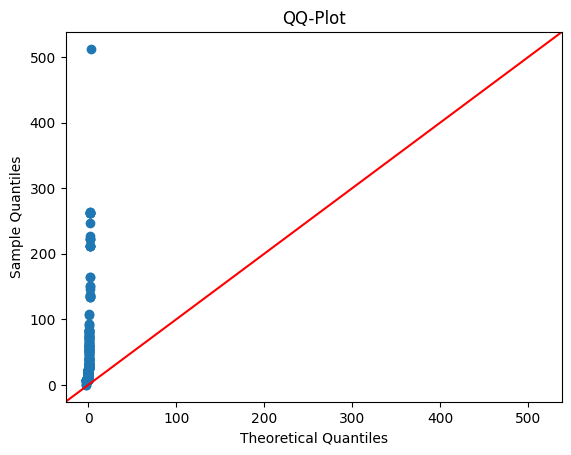

In [63]:
sm.qqplot(df["Fare"], line='45')
plt.title("QQ-Plot")
plt.show()

**Hist + KDE**

In [138]:
st.mode(df["Age"])

27.0

0.3894642407454042 0.35526315789473684


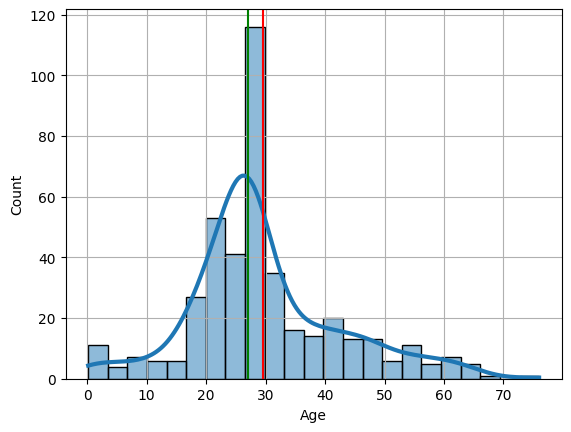

In [162]:
sns.histplot(data=df, x="Age", kde=True, line_kws={'linewidth': 3})
mean_max = np.mean(df["Age"]/df["Age"].max())
median_max = np.median(df["Age"]/df["Age"].max())
mode_max = st.mode(df["Age"])
plt.axvline(ymin=0,ymax=mode_max,x=df["Age"].mean(), color="red",label="Mean")
plt.axvline(ymin=0,ymax=mode_max,x=df["Age"].median(), color="green",label="Median")
plt.grid(True)
print(mean_max, median_max)

**Confidence Interval**

Mean: 6.78
95% Confidence Interval: (4.64, 8.92)


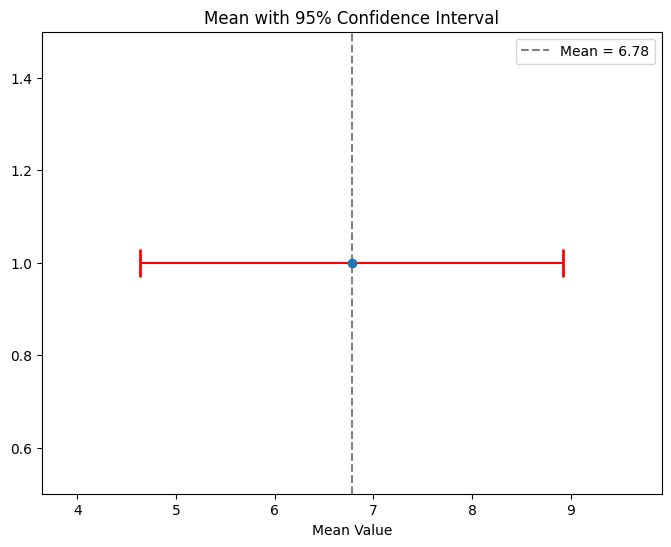

In [124]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample data
data = np.array([2.3, 3.1, 4.5, 5.6, 7.2, 6.3, 8.1, 9.0, 10.5, 11.2])

# Compute mean and standard error of the mean
mean = np.mean(data)
sem = stats.sem(data)

# Compute 95% confidence interval
confidence = 0.95
ci = stats.t.interval(confidence, len(data)-1, loc=mean, scale=sem)

print(f"Mean: {mean:.2f}")
print(f"95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})")

# Plot the data
plt.figure(figsize=(8, 6))
plt.errorbar(mean, 1, xerr=[[mean-ci[0]], [ci[1]-mean]], fmt='o', capsize=10, capthick=2, ecolor='red', linestyle='none')
plt.axvline(mean, color='gray', linestyle='--', label=f'Mean = {mean:.2f}')
plt.ylim(0.5, 1.5)  # Adjust x-axis limits for a single data point
plt.xlim(ci[0] - 1, ci[1] + 1)  # Adjust y-axis limits to fit the confidence interval

# Customize labels and title
plt.xlabel('Mean Value')
plt.title('Mean with 95% Confidence Interval')
plt.legend()

# Show plot
plt.show()


**Box Plot**

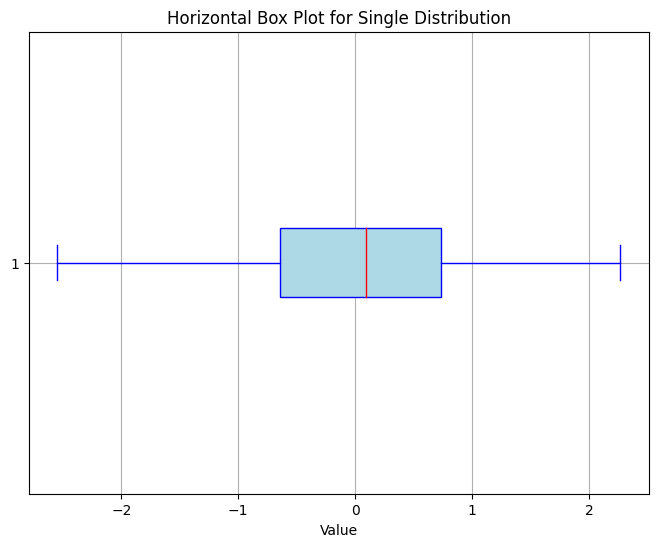

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=100)

# Plot horizontal box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'))

plt.xlabel('Value')
plt.title('Horizontal Box Plot for Single Distribution')
plt.grid(True)
plt.show()


## Final Fucntions

In [184]:
def plot_numerical_summary(df: pd.DataFrame, col: str):
    """ 
    Performs normality check on continuous variable,
    and visually show's test statistics.

    Parameters:
    df (pd.DataFrame): pandas dataframe

    col (str): column name present in dataframe

    Returns:
    None
    """
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    df_dict=check_normality(df[col])
    df_hypo_title = "{}\n{}\np-value:{} alpha: 0.05\n Result: {}".format(df_dict["h0"],
                                                                            df_dict["h1"],
                                                                            df_dict["p_val"],
                                                                            df_dict["cc"])

    fig.suptitle(df_hypo_title)

    # plot 1 : QQ plot
    sm.qqplot(df[col], line='45', ax=axs[0][0])
    axs[0][0].set_title("Q-Q Plot")
    axs[0][0].grid(True)
    
    # plot 2 : hist plot
    sns.histplot(data=df, x=col, kde=True, ax=axs[0][1], alpha=0.25, line_kws={'linewidth': 3})
    # measure of central tendency
    mean_max = np.round(st.mean(df[col]), 2)
    median_max = np.round(st.median(df[col]), 2)
    mode_max = np.round(st.mode(df[col]), 2)
    axs[0][1].set_title(f"Mean: {mean_max} | Median: {median_max} | Mode: {mode_max}")
    axs[0][1].axvline(ymin=0,ymax=mode_max,x=df[col].mean(), color="red",label="Mean")
    axs[0][1].axvline(ymin=0,ymax=mode_max,x=df[col].median(), color="green",label="Median")
    axs[0][1].set_xlabel(col)
    axs[0][1].legend()
    axs[0][1].grid(True)

    # plot 3 : confidence interval
    # Compute mean and standard error of the mean
    mean = np.mean(df[col])
    sem = stats.sem(df[col])
    # Compute 95% confidence interval
    confidence = 0.95
    ci = stats.t.interval(confidence, len(df)-1, loc=mean, scale=sem)
    # plotting diagram
    axs[1][0].errorbar(mean, 1, xerr=[[mean-ci[0]], [ci[1]-mean]], fmt='o', capsize=10, capthick=2, ecolor='red', linestyle='none')
    axs[1][0].axvline(mean, color='gray', linestyle='--', label=f'Mean = {mean:.2f}')
    axs[1][0].set_ylim(0.5, 1.5) 
    axs[1][0].set_xlim(ci[0] - 1, ci[1] + 1) 
    # Customize labels and title
    axs[1][0].set_xlabel('Mean Value')
    axs[1][0].set_title(f'Mean: {mean:.2f} | 95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})')
    axs[1][0].legend()
    axs[1][0].grid(True)

    
    # plot 4 : box plot
    axs[1][1].boxplot(df[col], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            # meanprops=dict(color='red'),
            medianprops=dict(color='green'))
    axs[1][1].set_xlabel('Value')
    axs[1][1].set_title('Horizontal Box Plot')
    axs[1][1].grid(True)

    plt.tight_layout()
    plt.show()

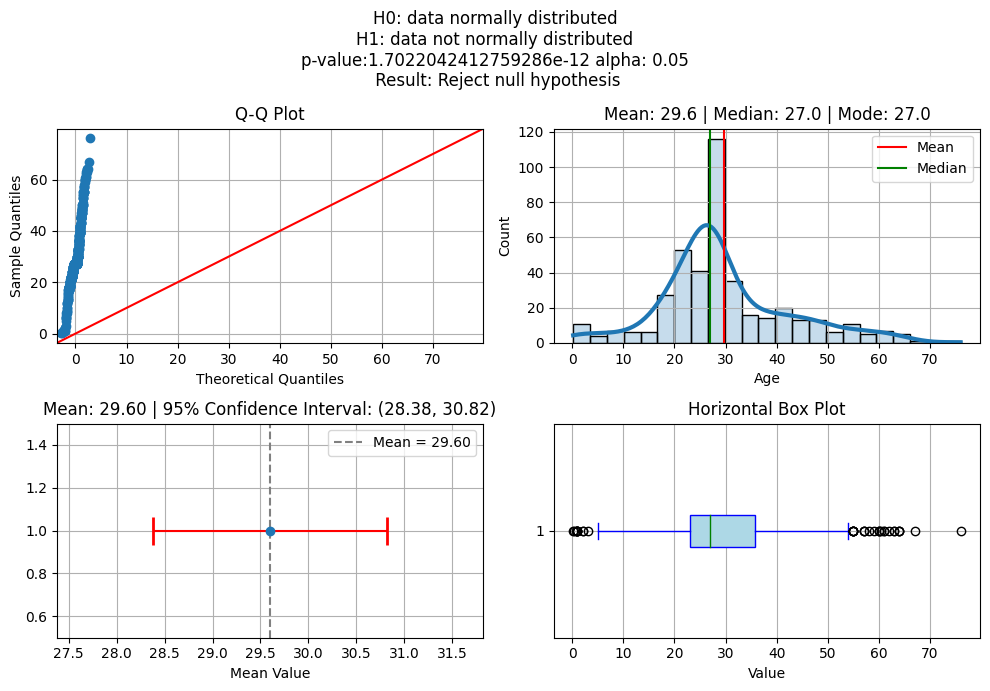

In [185]:
plot_numerical_summary(df, "Age")

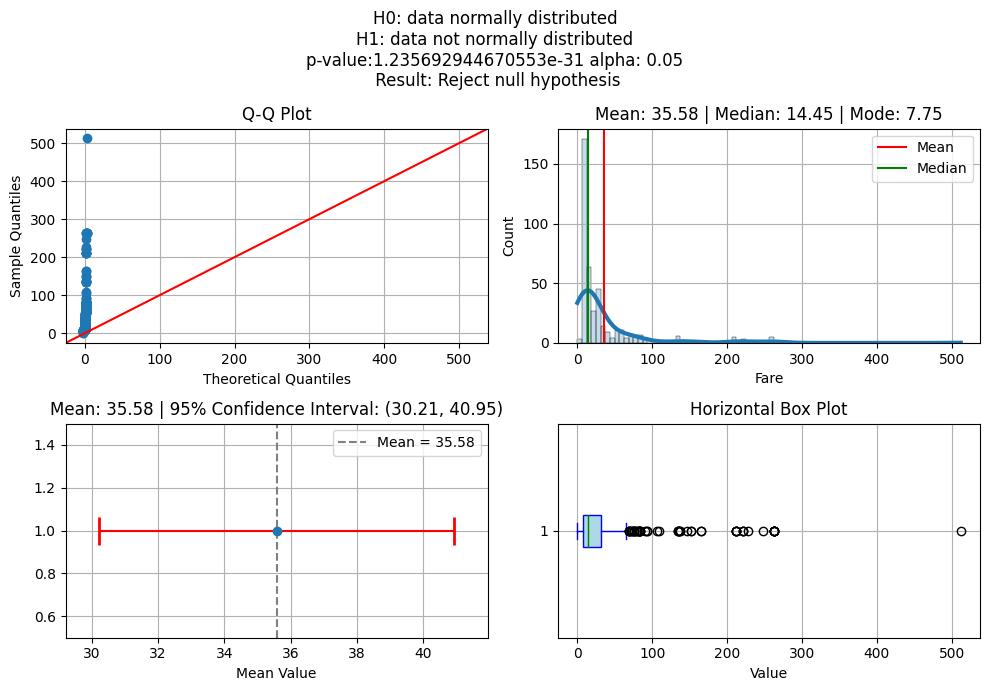

In [186]:
plot_numerical_summary(df, "Fare")

#### Categorical

| **Chi-Square Test Distribution**| all plot should match color |
|---------|-----------|
|observed vs expected with threshold | Pie chart|